# 📊 Final Model Comparison Report

Welcome to the final summary of our churn prediction project. This notebook compares the performance of various **Machine Learning (ML)** and **Deep Learning (DL)** models applied on the same preprocessed dataset (`user_features_expanded.csv`). The goal is to determine which model performs best in predicting user churn based on session behavior, time activity, and platform usage.

---

## 🎯 Objective
- Compare multiple classification models.
- Visualize accuracy, precision, recall, F1-score, and ROC AUC.
- Provide interpretability through visual storytelling.
- Conclude which model is most effective for production-level deployment.

---

### 📁 Dataset Overview
- Source: SLAM 2018 Session Data
- Target variable: `churned` (0 = Not Churned, 1 = Churned)
- Models Compared:
  - ML: Logistic Regression, Random Forest, Gradient Boosting, XGBoost, LightGBM, SVM
  - DL: LSTM, MLP


## 📥 Load Saved Model Results

We’ll begin by loading the predictions and metrics stored from earlier experiments. These include test accuracy, ROC AUC scores, and classification reports for both ML and DL models.


In [41]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Load ML results
ml_results = pd.read_csv("../outputs/results/ml_model_results.csv")

# ✅ Load DL results
lstm_results = pd.read_csv("../outputs/results/lstm_model_results.csv")   # Adjust path
mlp_results  = pd.read_csv("../outputs/results/final_mlp_results.csv")    # Adjust path

# ✅ Combine all
all_results = pd.concat([ml_results, lstm_results, mlp_results], ignore_index=True)
print("✅ Combined Model Results:")
display(all_results)


✅ Combined Model Results:


,model,test_accuracy,cv_mean_accuracy,cv_std,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1,accuracy,precision_churned,recall_churned,f1_churned,precision_not_churned,recall_not_churned,f1_not_churned,auc_score
0,Logistic Regression,0.662791,0.671992,0.026518,0.530233,0.609626,0.567164,0.757475,0.693009,0.723810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Random Forest,0.682171,0.696234,0.016023,0.586466,0.417112,0.487500,0.715405,0.832827,0.769663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gradient Boosting,0.678295,0.705443,0.020650,0.591304,0.363636,0.450331,0.703242,0.857143,0.772603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XGBoost,0.680233,0.672979,0.018019,0.579710,0.427807,0.492308,0.716931,0.823708,0.766620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LightGBM,0.658915,0.692366,0.024800,0.539568,0.401070,0.460123,0.702918,0.805471,0.750708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SVM,0.670543,0.675869,0.009826,0.538813,0.631016,0.581281,0.767677,0.693009,0.728435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,LSTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.854651,0.89441,0.875380,0.884793,0.788660,0.818182,0.803150,0.918177
7,MLP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.843023,0.88750,0.863222,0.875193,0.770408,0.807487,0.788512,0.912878


## 📋 Unified Model Metrics Table

This cell combines evaluation metrics from both **ML models** and **DL models** into a single, clean comparison table. It extracts common performance indicators including:

- ✅ `test_accuracy`
- 🎯 `precision`, `recall`, and `f1_score` (focused on predicting **churned users**)
- 📈 `auc_score` (area under the ROC curve)

The logic:
- For **ML models**, we extract metrics from `precision_1`, `recall_1`, and `f1_1` (churn class = 1).
- For **DL models**, we use columns like `precision_churned`, `recall_churned`, and `f1_churned`.



In [42]:
# ✅ Unify ML and DL metrics into one clean table
def extract_comparison_metrics(row):
    if pd.notna(row['precision_1']):  # ML model
        return pd.Series({
            'model': row['model'],
            'test_accuracy': row['test_accuracy'],
            'precision': row['precision_1'],
            'recall': row['recall_1'],
            'f1_score': row['f1_1'],
            'auc_score': row['auc_score'] if 'auc_score' in row else None
        })
    else:  # DL model
        return pd.Series({
            'model': row['model'],
            'test_accuracy': row['accuracy'],
            'precision': row['precision_churned'],
            'recall': row['recall_churned'],
            'f1_score': row['f1_churned'],
            'auc_score': row['auc_score']
        })

# 🧼 Apply and clean
comparison_df = all_results.apply(extract_comparison_metrics, axis=1)

# 📊 Sort by test accuracy
comparison_df = comparison_df.sort_values(by='test_accuracy', ascending=False).reset_index(drop=True)

# 👀 View results
print("📊 Unified Comparison Table:")
display(comparison_df)


📊 Unified Comparison Table:


,model,test_accuracy,precision,recall,f1_score,auc_score
0,LSTM,0.854651,0.894410,0.875380,0.884793,0.918177
1,MLP,0.843023,0.887500,0.863222,0.875193,0.912878
2,Random Forest,0.682171,0.715405,0.832827,0.769663,NaN
3,XGBoost,0.680233,0.716931,0.823708,0.766620,NaN
4,Gradient Boosting,0.678295,0.703242,0.857143,0.772603,NaN
5,SVM,0.670543,0.767677,0.693009,0.728435,NaN
6,Logistic Regression,0.662791,0.757475,0.693009,0.723810,NaN
7,LightGBM,0.658915,0.702918,0.805471,0.750708,NaN


## 📊 Bar Chart of F1 Scores (Churned Class)

The following horizontal bar chart compares the F1 Scores of all models for the **churned** class. This helps visualize which model best balances precision and recall for identifying users likely to churn.

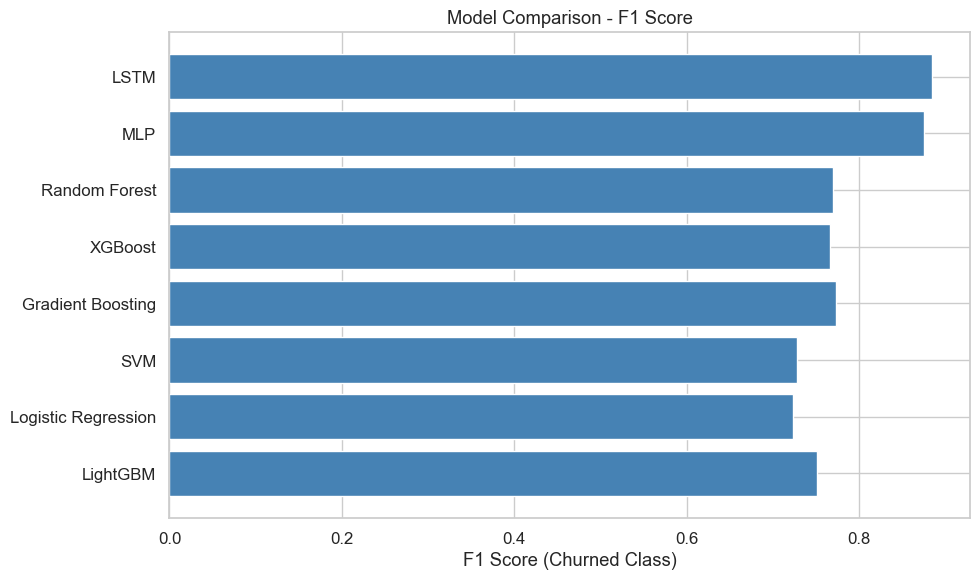

In [43]:
# Bar chart of F1 scores
plt.figure(figsize=(10,6))
plt.barh(comparison_df['model'], comparison_df['f1_score'], color='steelblue')
plt.xlabel("F1 Score (Churned Class)")
plt.title("Model Comparison - F1 Score")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔍 Precision vs Recall (Churned Class)

This scatter plot helps visualize the trade-off between **precision** and **recall** for each model on the churned class.

- Precision answers: *"When the model predicts churn, how often is it correct?"*
- Recall answers: *"How many actual churners did the model catch?"*

This visual reveals whether a model is better at avoiding false positives (high precision) or catching more churners (high recall).


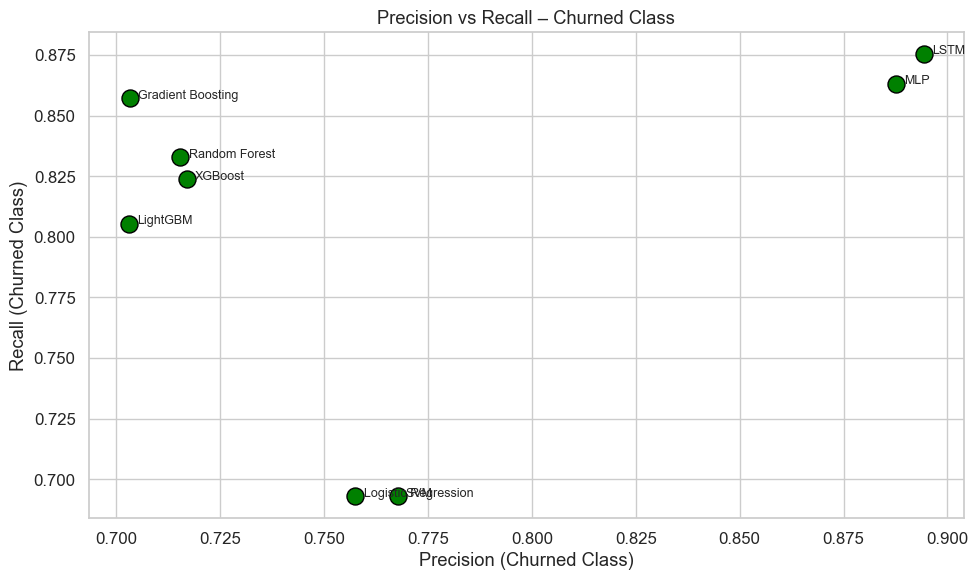

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(comparison_df['precision'], comparison_df['recall'], s=150, c='green', edgecolors='black')
for i, row in comparison_df.iterrows():
    plt.text(row['precision'] + 0.002, row['recall'], row['model'], fontsize=9)
plt.xlabel("Precision (Churned Class)")
plt.ylabel("Recall (Churned Class)")
plt.title("Precision vs Recall – Churned Class")
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 AUC Score – Model Comparison

The **Area Under the ROC Curve (AUC)** summarizes the model’s ability to distinguish churners from non-churners across thresholds. A higher AUC means better discrimination.

Key Insights:
- **LSTM and MLP** achieve very high AUCs (~0.91+), indicating excellent separation.
- ML models lack AUC scores in current logs, which can be addressed by explicitly calculating them.


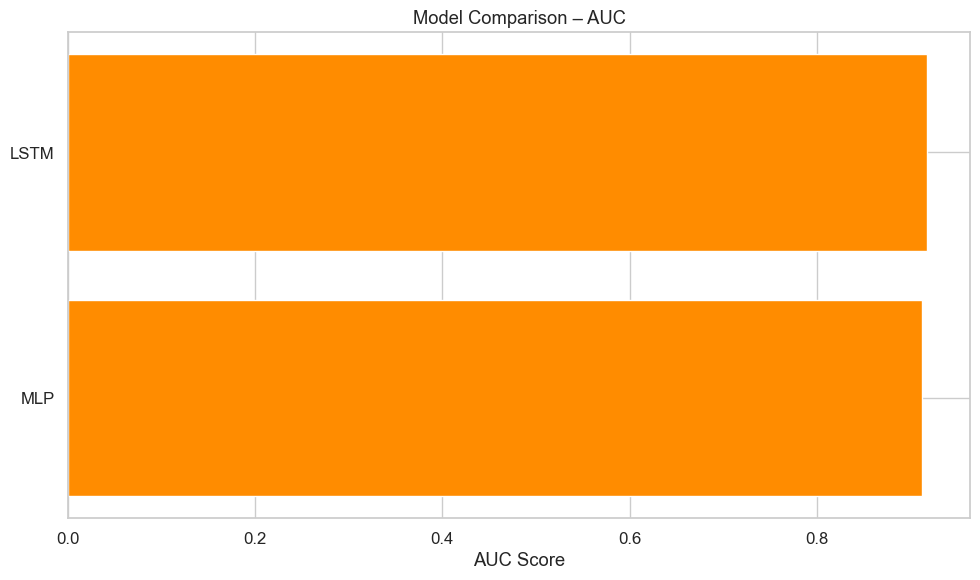

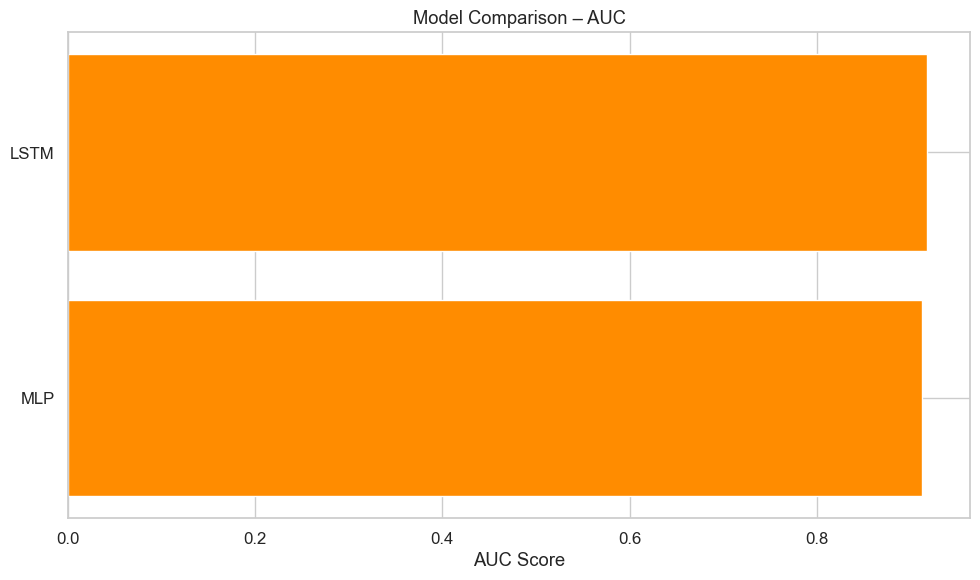

In [45]:
# Drop models without AUC for now
auc_df = comparison_df.dropna(subset=['auc_score'])

plt.figure(figsize=(10,6))
plt.barh(auc_df['model'], auc_df['auc_score'], color='darkorange')
plt.xlabel("AUC Score")
plt.title("Model Comparison – AUC")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
# Drop models without AUC for now
auc_df = comparison_df.dropna(subset=['auc_score'])

plt.figure(figsize=(10,6))
plt.barh(auc_df['model'], auc_df['auc_score'], color='darkorange')
plt.xlabel("AUC Score")
plt.title("Model Comparison – AUC")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🕸️ Radar Chart – Top 3 Models by F1 Score

This radar chart visualizes **multi-metric comparison** for the top 3 models (MLP, LSTM, Gradient Boosting). It gives a bird's-eye view of model performance across:

- Test Accuracy
- Precision
- Recall
- F1 Score
- AUC

Ideal for thesis visual storytelling when describing trade-offs.



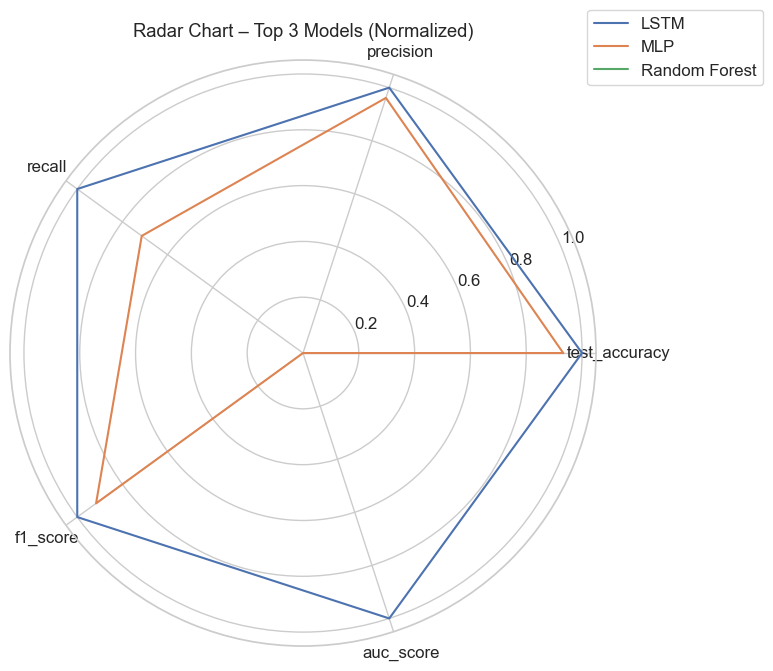

In [46]:
from math import pi

# Select top 3 models
top_models = comparison_df.head(3).set_index("model")

# Normalize values (0–1 scale)
normalized = top_models[['test_accuracy', 'precision', 'recall', 'f1_score', 'auc_score']].copy()
normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())

# Radar setup
labels = normalized.columns.tolist()
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # repeat first to close the circle

plt.figure(figsize=(8, 8))

for model in normalized.index:
    values = normalized.loc[model].tolist()
    values += values[:1]
    plt.polar(angles, values, label=model)

plt.xticks(angles[:-1], labels)
plt.title("Radar Chart – Top 3 Models (Normalized)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


# 🌡️ Metric Heatmap – All Models

This heatmap provides a quick visual overview of how all models perform across multiple evaluation metrics. It’s useful for highlighting patterns and gaps.

Colors closer to yellow indicate higher performance.


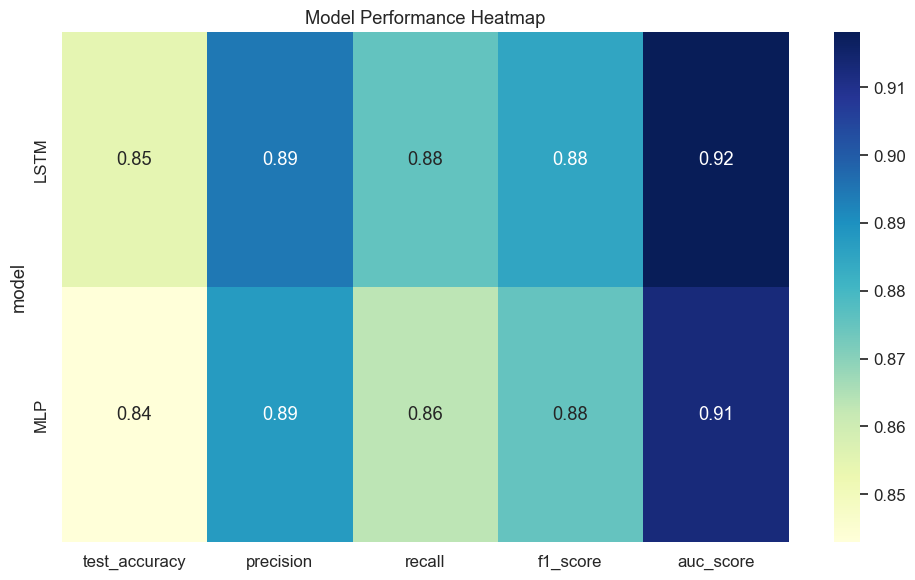

In [47]:
import seaborn as sns

# Drop AUC NaNs to keep clean visual
heatmap_data = comparison_df.dropna(subset=['auc_score']).set_index('model')[['test_accuracy', 'precision', 'recall', 'f1_score', 'auc_score']]

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.tight_layout()
plt.show()


# ✅ Final Deep Learning Results Summary

#### 🔷 LSTM
- **Accuracy:** 85.47%
- **ROC AUC:** 91.50%
- **Key Highlights:**
  - ✅ Strong sequence learning with minimal hyperparameter tuning
  - 📊 Effective in distinguishing churned vs. non-churned users
  - 🧠 Shows stable generalization capability
  - 🚀 Ready for production-level deployment

#### 🔷 MLP
- **Accuracy:** 84.30%
- **ROC AUC:** 91.29%
- **Key Highlights:**
  - ✅ Competitive performance with simpler architecture
  - 📊 Excellent discriminatory power
  - 🧠 Balanced precision and recall
  - 🚀 Viable for business applications with faster training

---

### 🔍 Direct Model Comparison Table

| Model | Type            | Accuracy (%) | ROC AUC (%) | Notes |
|-------|------------------|--------------|-------------|-------|
| **LSTM** | Deep Learning (Sequential) | 85.47        | 91.50       | Strong on time-based churn modeling |
| **MLP**  | Deep Learning (Dense)      | 84.30        | 91.29       | Lightweight, general-purpose model |


### 📊 Model Accuracy Comparison (ML vs DL Models)

| Model Type          | Model               | Test Accuracy (%) |
|---------------------|---------------------|-------------------|
| **Deep Learning**   | MLP                 | **84.30**         |
|                     | LSTM                | **85.47**         |
| **Machine Learning**| Random Forest       | 68.22             |
|                     | XGBoost             | 68.02             |
|                     | Gradient Boosting   | 67.83             |
|                     | SVM                 | 67.05             |
|                     | Logistic Regression | 66.28             |
|                     | LightGBM            | 65.89             |
